
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris)**


## 1. Understand and experiment MLP on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[-1.01279279  1.40046105] [1. 0.]
[ 0.63668832 -0.17965119] [1. 0.]
[0.34816592 0.17628696] [1. 0.]
[ 0.8852061  -1.14986937] [0. 1.]
[-0.39582143  1.15248132] [1. 0.]
[ 0.68945236 -1.58819417] [0. 1.]
[-0.81038314  0.02766056] [0. 1.]
[ 1.08361899 -1.49313514] [0. 1.]
[0.58699126 0.7784088 ] [1. 0.]
[-0.86938517  1.59812225] [1. 0.]
[-0.3679812  -1.86009484] [0. 1.]
[0.91776395 0.06786451] [1. 0.]
[-0.11371946 -1.09276772] [0. 1.]
[0.51209944 0.28465529] [1. 0.]
[-0.74739238  0.46621167] [0. 1.]
[ 0.07633418 -1.85444792] [0. 1.]
[-0.37943809 -0.31983643] [0. 1.]
[ 0.26451918 -1.61526356] [0. 1.]
[-1.08190528  1.04028929] [1. 0.]
[ 0.69153356 -0.02498007] [1. 0.]
[-1.52811324  0.03237542] [1. 0.]
[0.03125449 1.58293032] [1. 0.]
[ 1.0777999  -0.07246988] [0. 1.]
[0.28809099 0.85895982] [1. 0.]
[-1.01354903  1.4011365 ] [1. 0.]
[-0.19471534  1.12166198] [1. 0.]
[ 1.91042477 -0.15137

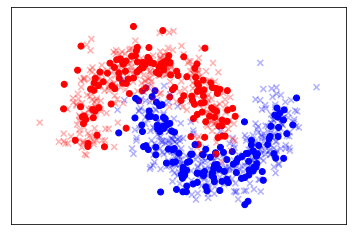

In [1]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of hyper-parameter values has been chosen.
**YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS (and probably other hyper-parameters) IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**


MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, early_stopping=True,
              hidden_layer_sizes=(5, 20), learning_rate_init=0.005, max_iter=35,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.31311495
Validation score: 0.740741
Iteration 2, loss = 0.89119991
Validation score: 0.759259
Iteration 3, loss = 0.66365527
Validation score: 0.777778
Iteration 4, loss = 0.58960176
Validation score: 0.759259
Iteration 5, loss = 0.56059453
Validation score: 0.777778
Iteration 6, loss = 0.55658447
Validation score: 0.759259
Iteration 7, loss = 0.54332021
Validation score: 0.777778
Iteration 8, loss = 0.53633861
Validation score: 0.759259
Iteration 9, loss = 0.53247451
Validation score: 0.777778
Iteration 10, loss = 0.52391942
Validation score: 0.777778
Iteration 11, loss = 0.51330226
Validation score: 0.759259
Iteration 12, loss = 0.50184109
Validation score: 0.777778
Iteration 13, lo

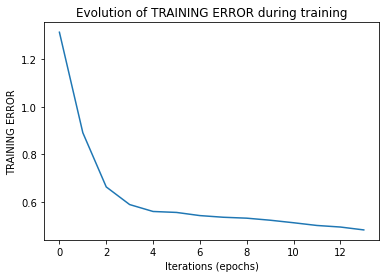

Acuracy (on test set) =  0.8396825396825397


In [2]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)
mlp = MLPClassifier(hidden_layer_sizes=(5, 20), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=35, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Acuracy (on test set) = ", score)
              

## Below, we visualize the learnt boundary between classes in (2D) input space ##

**THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

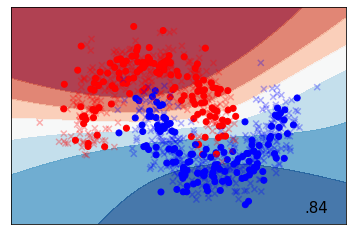

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plots, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find an optimized set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS TRY TO FIND OPTIMIZED VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001]}]
Best parameters set found on development set:

{'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}

Grid scores on development set:

0.815 (+/-0.038) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.848 (+/-0.093) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.944 (+/-0.018) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.963 (+/-0.021) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.811 (+/-0.018) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.881 (+/-0.129) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.967 (+/-0.031) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.933 (+/-0.036) for {'alpha': 1e-05, 'hidden_la

C:\Users\wangfu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3: compute and plot the precision-recall curve (for each class).** NB: search into sciKit-learn documentation to find the function for that, and then add a code cell that uses it.

**Assignment #4: display the confusion matrix as a prettier and more easily understable plot (cf. example on https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)**

**Assignment #5 (optional): plot the first layer of weights as images (see explanations and example code at http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)**


Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

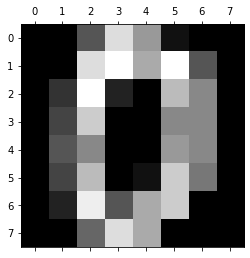

MLPClassifier(alpha=1e-05, batch_size=10, hidden_layer_sizes=(32, 64),
              max_iter=50, momentum=0.5, random_state=11, solver='sgd',
              tol=1e-05, verbose=True)
Iteration 1, loss = 2.13821136
Iteration 2, loss = 0.70195486
Iteration 3, loss = 0.47282440
Iteration 4, loss = 0.36275526
Iteration 5, loss = 0.29432838
Iteration 6, loss = 0.24489702
Iteration 7, loss = 0.21087060
Iteration 8, loss = 0.18986853
Iteration 9, loss = 0.17147891
Iteration 10, loss = 0.15534889
Iteration 11, loss = 0.14163791
Iteration 12, loss = 0.13069221
Iteration 13, loss = 0.11999762
Iteration 14, loss = 0.11245096
Iteration 15, loss = 0.10282017
Iteration 16, loss = 0.09942527
Iteration 17, loss = 0.09358707
Iteration 18, loss = 0.08483906
Iteration 19, loss = 0.08439102
Iteration 20, loss = 0.07528012
Iteration 21, loss = 0.07272847
Iteration 22, loss = 0.06707957
Iteration 23, loss = 0.06450592
Iteration 24, loss = 0.06099754
Iteration 25, loss = 0.05921828
Iteration 26, loss = 0.0556

C:\Users\wangfu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


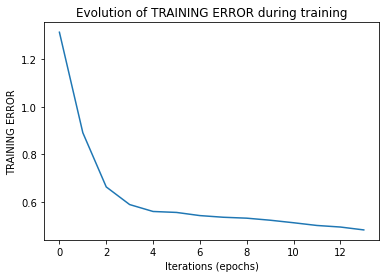

Acuracy (on test set) =  0.9537037037037037
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      0.92      0.93        49
           2       0.95      1.00      0.97        56
           3       0.90      0.96      0.93        57
           4       0.97      0.95      0.96        66
           5       0.96      0.98      0.97        45
           6       1.00      0.94      0.97        47
           7       0.95      0.98      0.96        54
           8       0.96      0.91      0.93        53
           9       0.93      0.90      0.92        60

    accuracy                           0.95       540
   macro avg       0.96      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540

CONFUSION MATRIX below


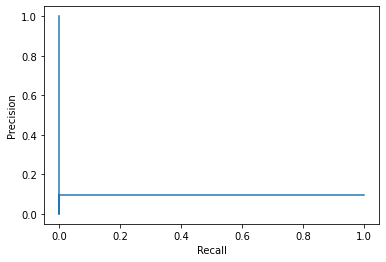

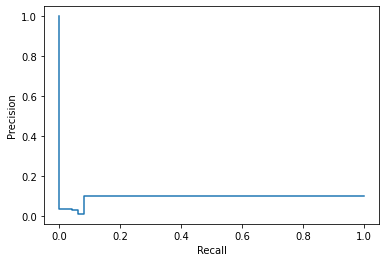

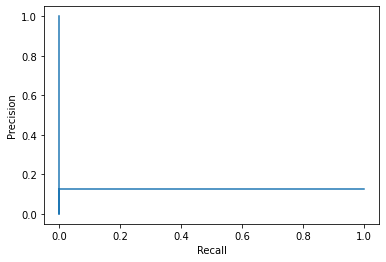

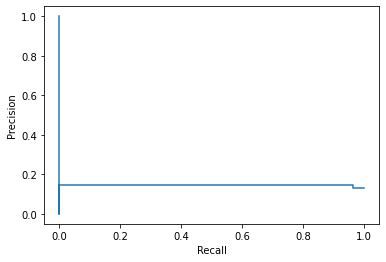

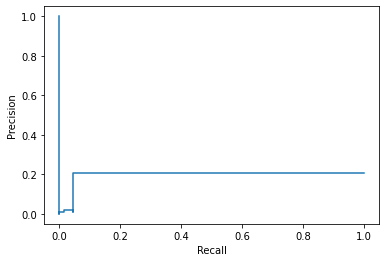

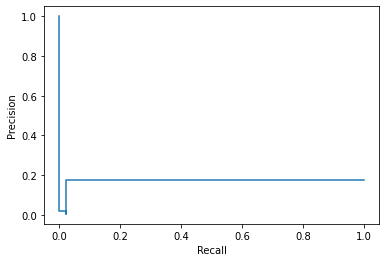

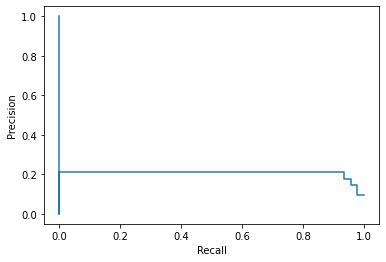

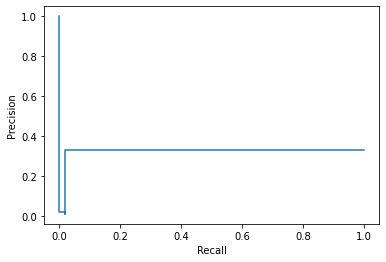

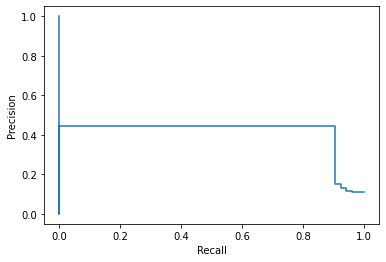

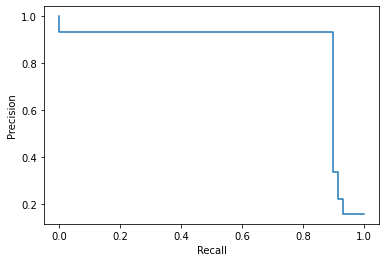

In [5]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.3)

clf = MLPClassifier(hidden_layer_sizes=(32, 64), activation='relu', solver='sgd', 
                    alpha=0.00001, batch_size=10, learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=50, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.5, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test,y_digits_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)   

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
for i in range(10):
    prec, recall, _= precision_recall_curve(y_true, y_pred, pos_label = clf.classes_[i])
    pr_display = PrecisionRecallDisplay(precision = prec, recall = recall).plot()

In [10]:
param_grid = [
  {'hidden_layer_sizes': [(32,), (64,)], 
   'learning_rate_init':[0.001, 0.01],
   'alpha': [0.00001, 0.0001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='relu', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(32,64), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xdigits_train, y_digits_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(32,), (64,)], 'learning_rate_init': [0.001, 0.01], 'alpha': [1e-05, 0.0001]}]
Best parameters set found on development set:

{'alpha': 1e-05, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.01}

Grid scores on development set:

0.940 (+/-0.021) for {'alpha': 1e-05, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.001}
0.937 (+/-0.008) for {'alpha': 1e-05, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.01}
0.947 (+/-0.018) for {'alpha': 1e-05, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001}
0.951 (+/-0.006) for {'alpha': 1e-05, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.01}
0.944 (+/-0.023) for {'alpha': 0.0001, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.001}
0.933 (+/-0.014) for {'alpha': 0.0001, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.01}
0.948 (+/-0.016) for {'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001}
0.928 (+/-0.063) for {'alpha': 0.0001, 'hidden_layer_sizes': (64,), '

Confusion matrix, without normalization
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  2]
 [ 0  0 56  0  0  0  0  0  0  0]
 [ 0  0  2 55  0  0  0  0  0  0]
 [ 0  0  0  0 63  0  0  2  1  0]
 [ 0  0  0  0  0 44  0  0  0  1]
 [ 0  1  0  0  1  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  1]
 [ 0  2  1  1  1  0  0  0 48  0]
 [ 0  0  0  4  0  1  0  1  0 54]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.91836735 0.         0.02040816 0.         0.
  0.         0.         0.02040816 0.04081633]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.03508772 0.96491228 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.95454545 0.
  0.         0.03030303 0.01515152 0.        ]
 [0.         0.         0.         0.         0.         0.9777777

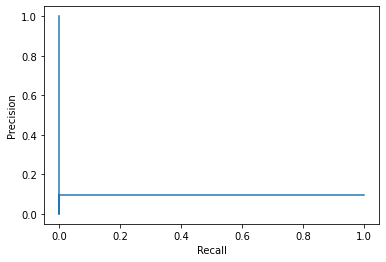

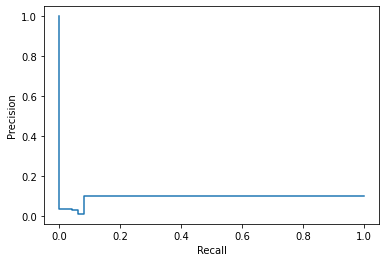

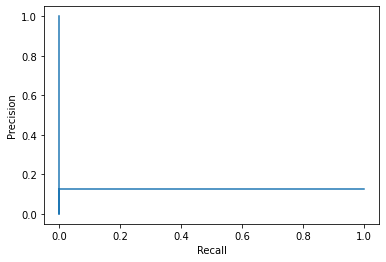

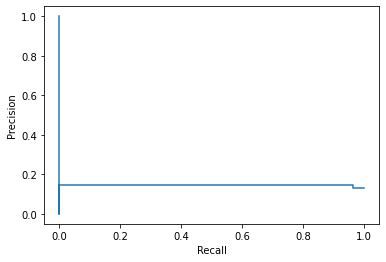

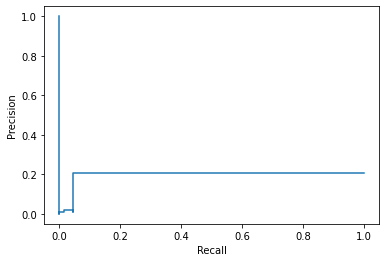

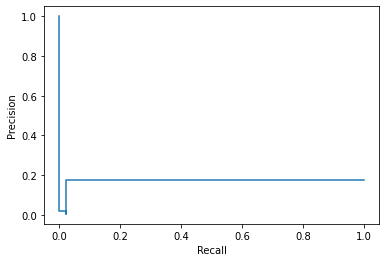

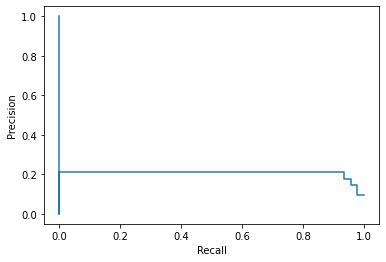

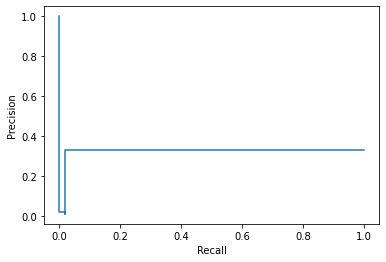

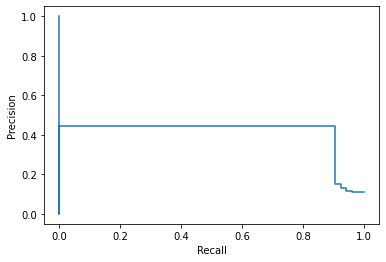

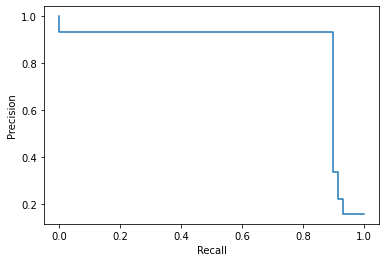

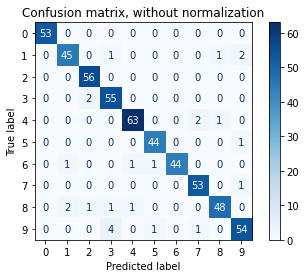

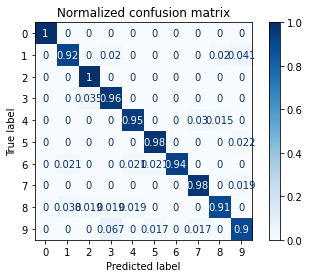

In [7]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
for i in range(10):
    prec, recall, _= precision_recall_curve(y_true, y_pred, pos_label = clf.classes_[i])
    pr_display = PrecisionRecallDisplay(precision = prec, recall = recall).plot()

from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xdigits_test, y_digits_test,
                                 display_labels=clf.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

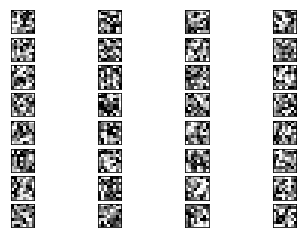

In [9]:
import warnings

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
fig, axes = plt.subplots(8, 4)
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()